### 1) check null values
### 2) handle outliers
### 3) analyze correlation matrix
### 4) analyze multicollinearity
### 5) EDA


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Insights:
#### Min value of Glucose in woman is 40
#### Min value of BloodPressure in woman is 60, For a healthy Person BP must have 120/80
#### Min value of SkinThickness in woman is 50
#### Min value of Insulin in woman is 2, and it ranges from 2 - 25
#### Min value of BMI in women is 18.5, and it ranges from 18.5 - 24.9 for a healthy person, 25.0 - 29.9 for overweight, 30.0>= for obesity people

## According to given dataset
#### BloodPressure min value = 0 and max value = 122
#### Glucose min value = 44 and max value = 199

In [5]:
# step - 1 : Checking for null values
data.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### As the above output shows there are no null values in the dataset

In [6]:
(data == 0).sum() # tells us about the number of 0s in each column

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [7]:

# Replacing 0 with median values

data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].median())

data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].median())

data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].median())

data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].median())

data['BMI'] = data['BMI'].replace(0, data['BMI'].median())

In [8]:
(data == 0).sum() # checking for 0 values

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
# step - 2 : Understanding feature - target relationship using correlation


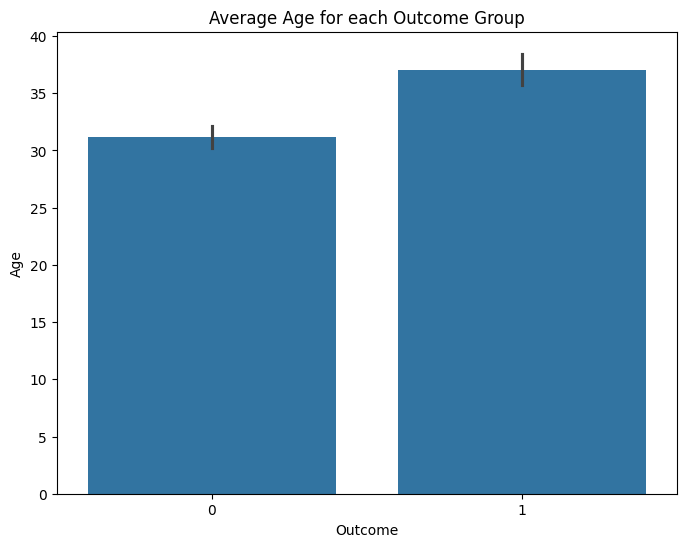

In [13]:
# Bar Plot for Age vs Outcome using mean
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Age', data=data, estimator='mean')
plt.title('Average Age for each Outcome Group')
plt.show()

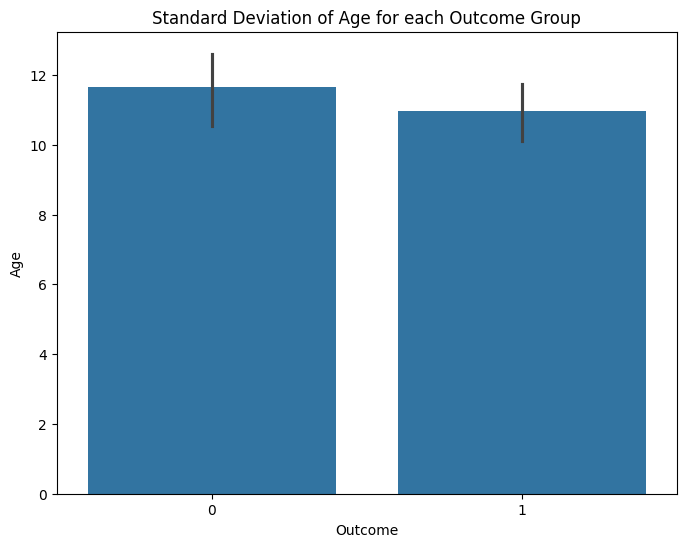

In [24]:
# Bar Plot for Age vs Outcome using standard deviation
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Age', data=data,estimator='std')
plt.title('Standard Deviation of Age for each Outcome Group')
plt.show()

In [21]:
data['Age'].groupby(data['Outcome']).mean()

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64

In [ ]:
data['Age'].groupby(data['Outcome']).std() # spread of the data 

Outcome
0    11.667655
1    10.968254
Name: Age, dtype: float64

In [23]:
data['Age'].groupby(data['Outcome']).count()

Outcome
0    500
1    268
Name: Age, dtype: int64

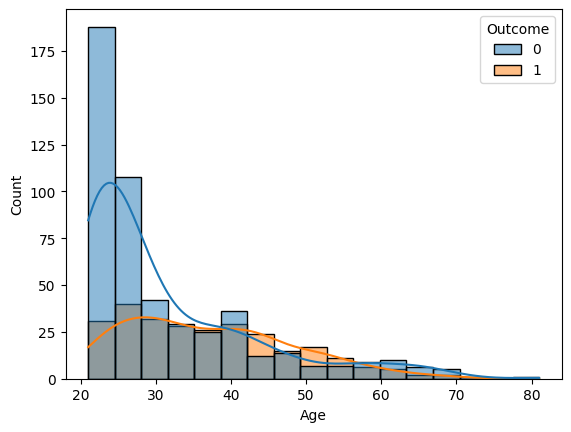

In [25]:
sns.histplot(x='Age', hue='Outcome', data=data, kde = True)
plt.show()

In [26]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

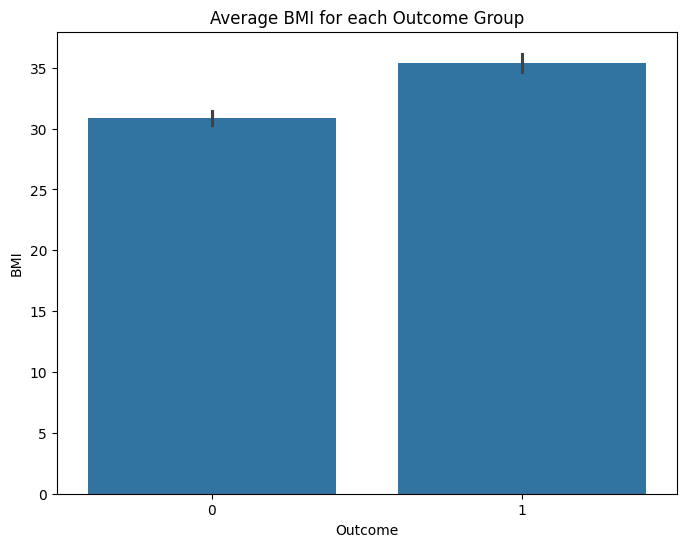

In [ ]:
# barplot for BMI vs Outcome  using mean
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='BMI', data=data, estimator='mean')
plt.title('Average BMI for each Outcome Group')
plt.show()


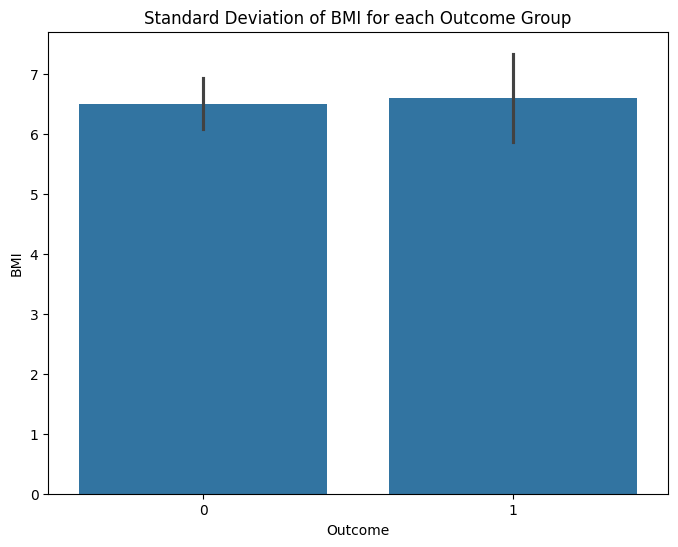

In [35]:
# barplot for BMI vs Outcome  using std
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='BMI', data=data, estimator='std')
plt.title('Standard Deviation of BMI for each Outcome Group')
plt.show()


In [31]:
data['BMI'].groupby(data['Outcome']).mean()

Outcome
0    30.880200
1    35.381343
Name: BMI, dtype: float64

In [32]:
data['BMI'].groupby(data['Outcome']).std()

Outcome
0    6.503074
1    6.596704
Name: BMI, dtype: float64

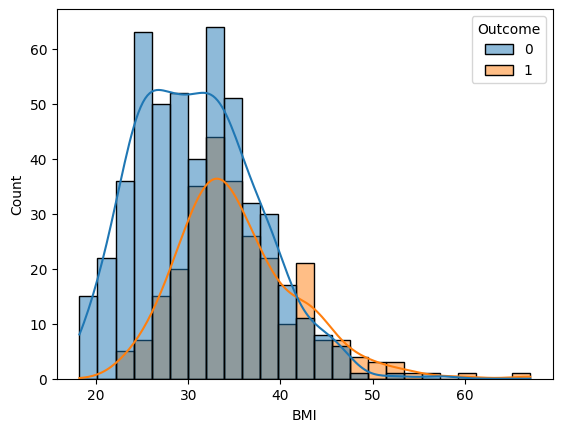

In [34]:
sns.histplot(x='BMI', hue='Outcome', data=data, kde=True)
plt.show()

In [ ]:
# applying t-test for age vs outcome

die_age = data[data['Outcome'] == 1]['Age']
non_die_age = data[data['Outcome'] == 0]['Age']

from scipy.stats import ttest_ind
stat, p = ttest_ind(die_age, non_die_age)

alpha = 0.05
# H0 : Both data are same
# H1 : Both data are different
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')

Reject the null hypothesis


#### As we observed we are rejecting NULL hypothesis H0 as p-value is less than alpha so Age is a good feature to predict the outcome, and Age is significantly different between the two groups

In [38]:
# applying t-test for BMI vs outcome

die_age = data[data['Outcome'] == 1]['BMI']
non_die_age = data[data['Outcome'] == 0]['BMI']

stat, p = ttest_ind(die_age, non_die_age)

alpha = 0.05
# H0 : Both data are same
# H1 : Both data are different
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')

Reject the null hypothesis


#### As we observed we are rejecting NULL hypothesis H0 as p-value is less than alpha so BMI is a good feature to predict the outcome, and BMI is significantly different between the two groups

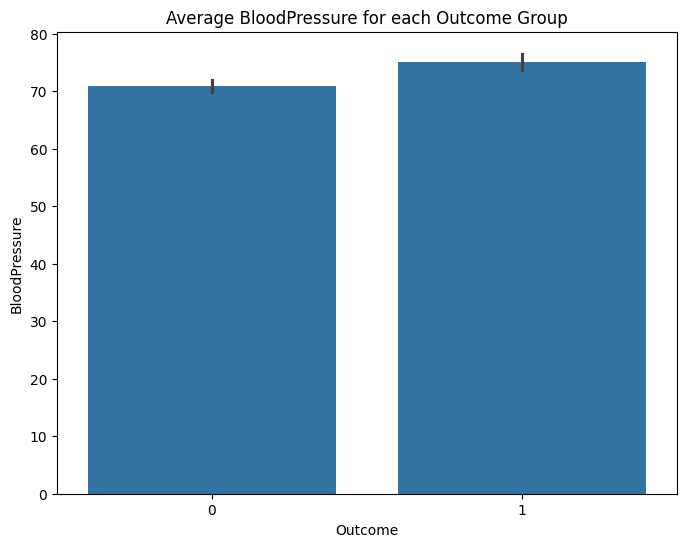

In [39]:
# barplot for Bloodpressure vs Outcome using mean
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='BloodPressure', data=data, estimator='mean')
plt.title('Average BloodPressure for each Outcome Group')
plt.show()


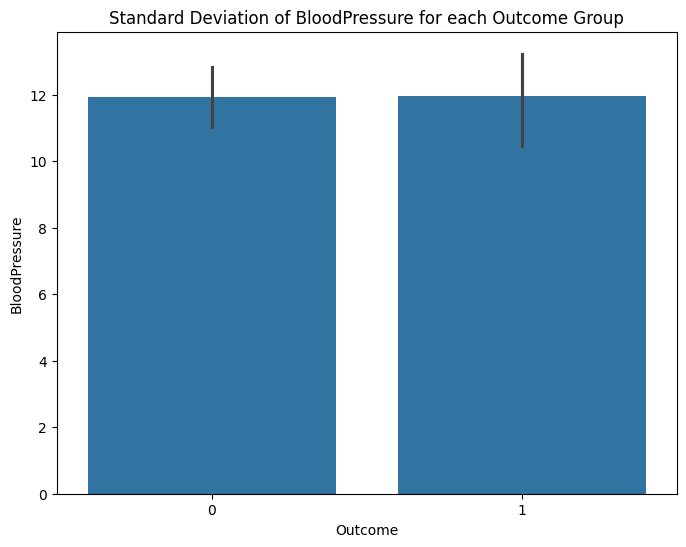

In [40]:
# barplot for Bloodpressure vs Outcome using std
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='BloodPressure', data=data, estimator='std')
plt.title('Standard Deviation of BloodPressure for each Outcome Group')
plt.show()


In [41]:
data['BloodPressure'].groupby(data['Outcome']).mean()

Outcome
0    70.920000
1    75.123134
Name: BloodPressure, dtype: float64

In [42]:
data['BloodPressure'].groupby(data['Outcome']).std()

Outcome
0    11.929385
1    11.951672
Name: BloodPressure, dtype: float64

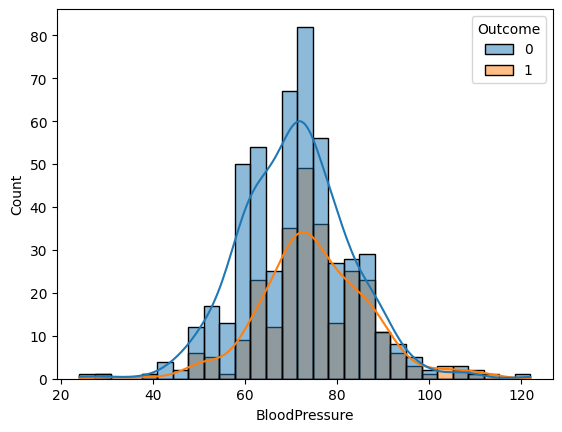

In [43]:
sns.histplot(x='BloodPressure', hue='Outcome', data=data, kde=True)
plt.show()

In [53]:
# applying t-test for BloodPressure vs Outcome

die_age = data[data['Outcome'] == 1]['BloodPressure']
non_die_age = data[data['Outcome'] == 0]['BloodPressure']

stat, p = ttest_ind(die_age, non_die_age)

alpha = 0.05
# H0 : Both data are same
# H1 : Both data are different
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')


Reject the null hypothesis


#### As we observed we are rejecting NULL hypothesis H0 as p-value is less than alpha so Bloodpressure is a good feature to predict the outcome, and BloodPressure is significantly different between the two groups

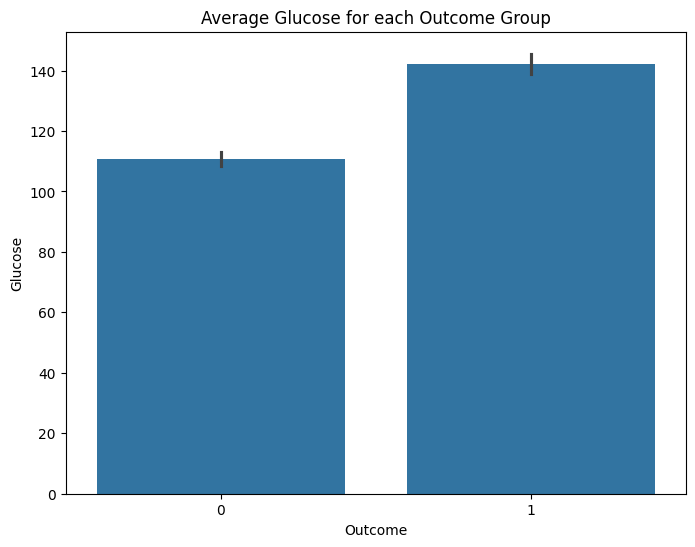

In [45]:
# barplot for Glucose vs Outcome using mean
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Glucose', data=data, estimator='mean')
plt.title('Average Glucose for each Outcome Group')
plt.show()


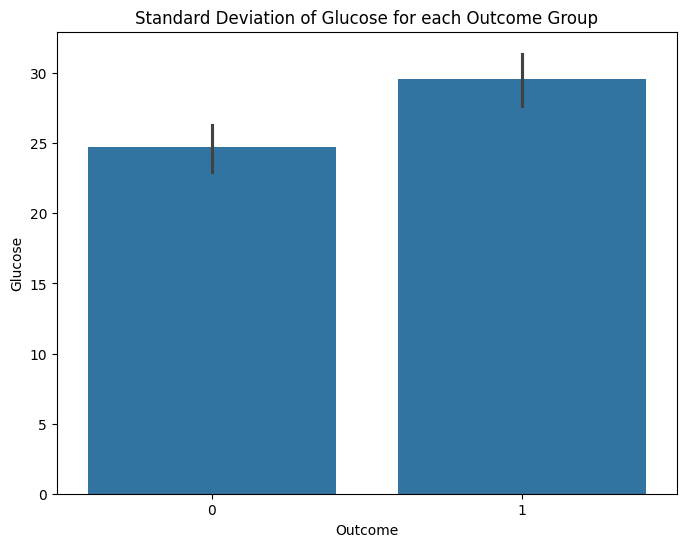

In [47]:
# barplot for Glucose vs Outcome using std
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Glucose', data=data, estimator='std')
plt.title('Standard Deviation of Glucose for each Outcome Group')
plt.show()


In [51]:
data['Glucose'].groupby(data['Outcome']).mean()

Outcome
0    110.682000
1    142.130597
Name: Glucose, dtype: float64

In [50]:
data['Glucose'].groupby(data['Outcome']).std()

Outcome
0    24.707201
1    29.568839
Name: Glucose, dtype: float64

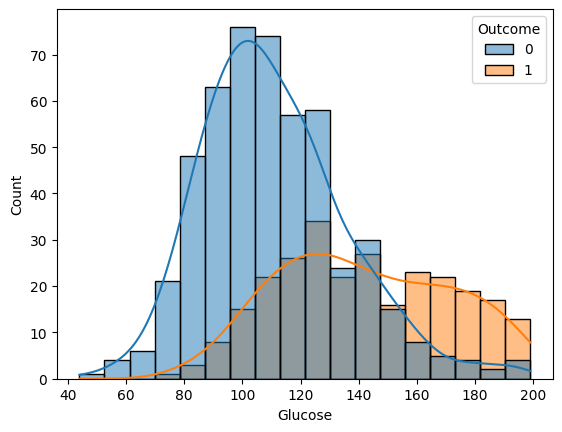

In [52]:
sns.histplot(x='Glucose', hue='Outcome', data=data, kde=True)
plt.show()

In [54]:
# applying t-test for Glucose vs Outcome

die_age = data[data['Outcome'] == 1]['Glucose']
non_die_age = data[data['Outcome'] == 0]['Glucose']

stat, p = ttest_ind(die_age, non_die_age)

alpha = 0.05
# H0 : Both data are same
# H1 : Both data are different
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')


Reject the null hypothesis


#### As we observed we are rejecting NULL hypothesis H0 as p-value is less than alpha so Glucose is a good feature to predict the outcome, and Glucose is significantly different between the two groups

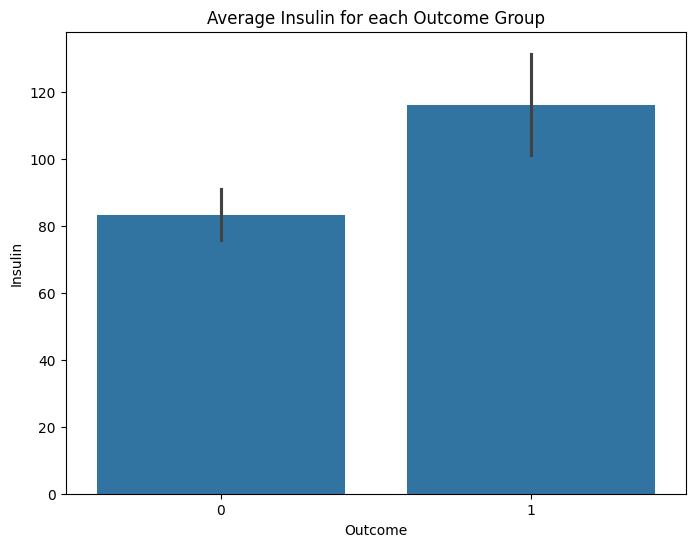

In [55]:
# barplot for Insulin vs Outcome using mean
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Insulin', data=data, estimator='mean')
plt.title('Average Insulin for each Outcome Group')
plt.show()


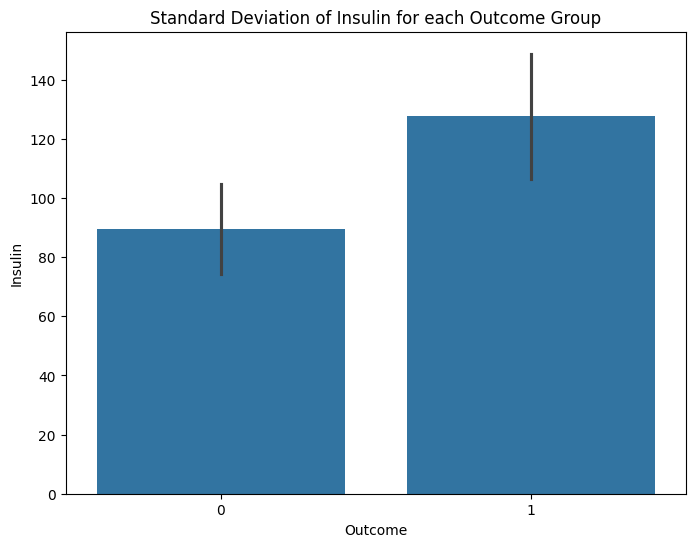

In [56]:
# barplot for Insulin vs Outcome using std
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Insulin', data=data, estimator='std')
plt.title('Standard Deviation of Insulin for each Outcome Group')
plt.show()


In [57]:
data['Insulin'].groupby(data['Outcome']).mean()

Outcome
0     83.188000
1    116.041045
Name: Insulin, dtype: float64

In [58]:
data['Insulin'].groupby(data['Outcome']).std()

Outcome
0     89.565700
1    127.689084
Name: Insulin, dtype: float64

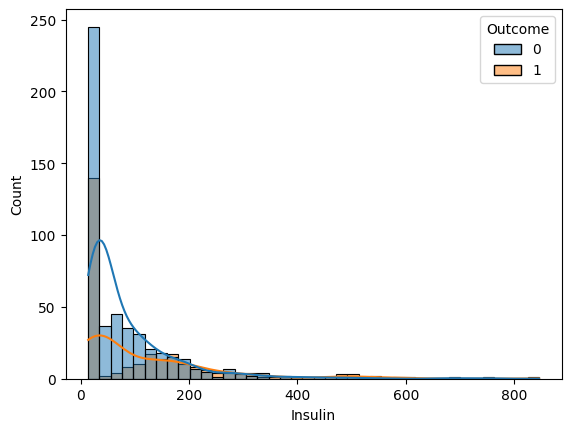

In [59]:
sns.histplot(x='Insulin', hue='Outcome', data=data, kde=True)
plt.show()

In [60]:
# applying t-test for Insulin vs Outcome

die_age = data[data['Outcome'] == 1]['Insulin']
non_die_age = data[data['Outcome'] == 0]['Insulin']

stat, p = ttest_ind(die_age, non_die_age)

alpha = 0.05
# H0 : Both data are same
# H1 : Both data are different
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')


Reject the null hypothesis


#### As we observed we are rejecting NULL hypothesis H0 as p-value is less than alpha so Insulin is a good feature to predict the outcome, and Insulin is significantly different between the two groups

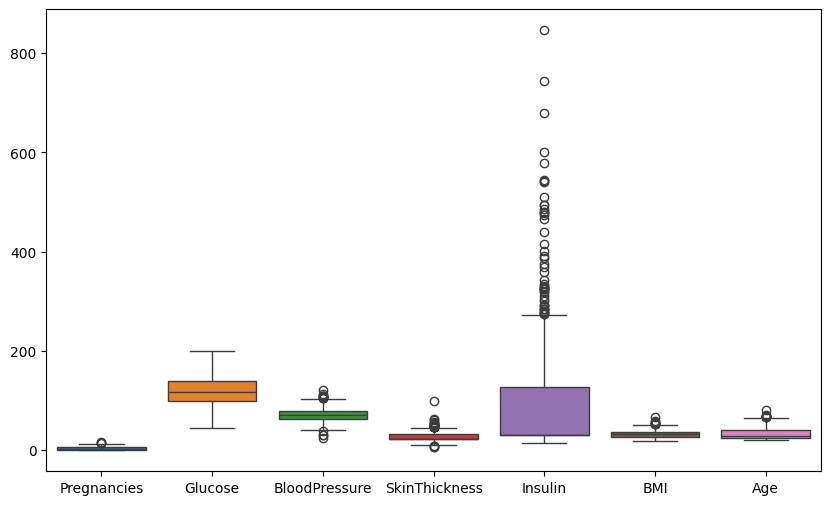

In [67]:
cols_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[cols_to_check])
plt.show()

In [68]:
from scipy import stats
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Calculate absolute Z-scores
z_scores = np.abs(stats.zscore(data[numerical_cols]))

# Keep only rows where ALL numerical columns have a Z-score less than 3
data_cleaned = data[(z_scores < 3).all(axis=1)]

print(f"Original rows: {len(data)}")
print(f"Rows after Z-score removal: {len(data_cleaned)}")
print(f"Total rows removed: {len(data) - len(data_cleaned)}")

Original rows: 768
Rows after Z-score removal: 719
Total rows removed: 49


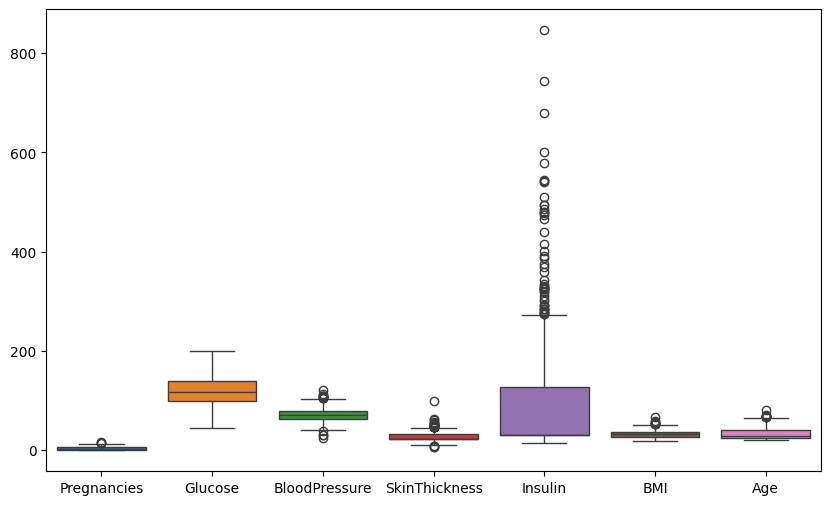

In [69]:
cols_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[cols_to_check])
plt.show()

In [71]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

scaler = MinMaxScaler()

# Fit and transform the cleaned data
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

# 5. Result
print("\nScaling Complete! Here are the first 5 rows:")
data.head()


Scaling Complete! Here are the first 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,1
1,1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,0
2,8,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,1
3,1,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [84]:
# training score
model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

train_score = accuracy_score(y_train, y_train_pred)
print("Training score:", train_score)

Training score: 0.7746741154562383


In [85]:
# testing score

y_test_pred = model.predict(X_test)

test_score = accuracy_score(y_test, y_test_pred)
print("Testing score:", test_score)

Testing score: 0.7532467532467533


In [86]:
confusion_matrix(y_train, y_train_pred)

array([[317,  32],
       [ 89,  99]])

In [88]:
confusion_matrix(y_test, y_test_pred)

array([[128,  23],
       [ 34,  46]])

In [89]:
y_pred_prob = model.predict_proba(X_test)